##### Copyright 2019 The TensorFlow Authors.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4998 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3735 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3391 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8748


In [3]:
import numpy as np
classifications = model.predict(test_images)
print(classifications.shape)
print(classifications[3])
c = np.zeros(100)
for j in range(0,100):
    for i in range(0,10):
        if (classifications[j,i]>0.5):
            c[j]=i
            break

(10000, 10)
[8.7144082e-07 9.9998331e-01 1.7516639e-08 1.4203351e-05 8.3325330e-07
 1.0688006e-10 8.7526718e-07 3.3433731e-15 1.5887500e-09 1.2796529e-10]


In [4]:
print(c.astype(int))
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 0 3 4 1 2 0 8 0 2 5 7 5 1 6 6 0 9 0 8 8 3 3 8 0 7
 5 7 9 6 1 6 7 6 7 6 1 6 6 4 6 5 8 2 2 8 6 8 0 7 7 8 5 1 1 0 4 7 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 2 5 3 6 7 1 8 0 1 6 2]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.1.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)           

In [5]:
import numpy as np
classifications = model.predict(test_images)

c = np.zeros(100)
for j in range(0,100):
    for i in range(0,10):
        if (classifications[j,i]>0.5):
            c[j]=i
            break

In [6]:
print(c.astype(int))
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1 6 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 6 7 6 7 2 1 2 6 4 6 5 8 2 2 8 6 8 0 7 7 8 5 1 1 0 4 7 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 2 2]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

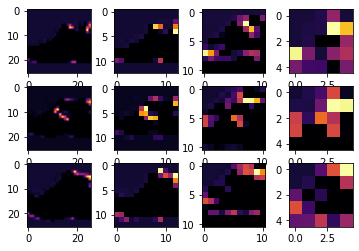

In [7]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [8]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.1.0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 59s 984us/sample - loss: 0.1290 - accuracy: 0.9609
Epoch 2/10
60000/60000 [==============================] - 56s 933us/sample - loss: 0.0447 - accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 56s 936us/sample - loss: 0.0274 - accuracy: 0.9914
Epoch 4/10
60000/60000 [==============================] - 56s 941us/sample - loss: 0.0182 - accuracy: 0.9942
Epoch 5/10
60000/60000 [==============================] - 57s 945us/sample - loss: 0.0119 - accuracy: 0.9960
Epoch 6/10
60000/60000 [==============================] - 56s 939us/sample - loss: 0.0086 - accuracy: 0.9976
Epoch 7/10
60000/60000 [==============================] - 56s 940us/sample - loss: 0.0069 - accuracy: 0.9978
Epoch 8/10
60000/60000 [==============================] - 57s 946us/sample - loss: 0.0065 - accuracy: 0.9977A: 0s - loss: 0
Epoch 9/10
60000/60000 [==============================] - 57s 955us/sample - loss: 0